#### Pre-processing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
import zipfile
import os

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image

main_path= 'data/brain_tumor_dataset'

data = []
labels = []

for label_name, label_value in [("yes", 1), ("no", 0)]:
    folder = os.path.join(main_path, label_name)

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        img = Image.open(img_path).convert("L")
        img = img.resize((100,100))
        img_array = np.array(img).flatten()
        data.append(img_array)
        labels.append(label_value)

df = pd.DataFrame(data)
df["label"] = labels

df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,59,59,59,59,59,59,59,59,59,60,...,24,23,22,23,23,23,22,22,21,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,4,6,6,5,4,5,4,3,6,...,4,4,4,6,6,4,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,52,61,58,57,56,56,56,56,55,55,...,20,20,22,21,20,20,21,19,21,1


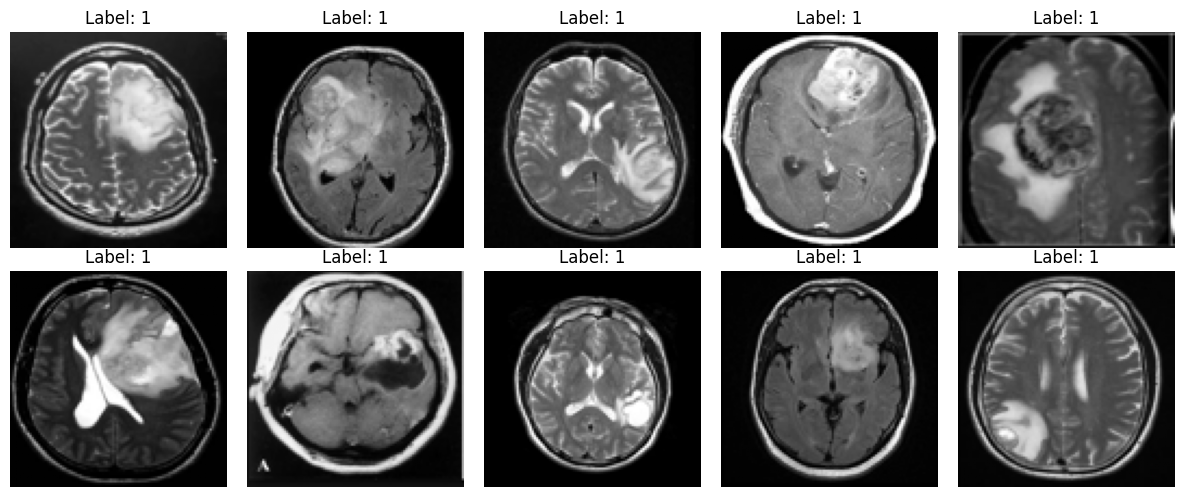

In [6]:
import matplotlib.pyplot as plt
n_rows, n_cols = 2, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))

for i in range(10):
    row = df.iloc[i, :-1]
    img_array = np.array(row, dtype=np.uint8)
    img_reshaped = img_array.reshape((100, 100))

    ax = axes[i // n_cols, i % n_cols]

    ax.imshow(img_reshaped, cmap='gray')
    ax.set_title(f"Label: {df.iloc[i, -1]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = df.drop(columns="label"), df["label"]

x_train, x_test, y_train, t_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Neural Network

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
model.fit(x_train, y_train, epochs=45, batch_size=32, validation_split=0.2)

Epoch 1/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6570 - loss: 0.7264 - val_accuracy: 0.5854 - val_loss: 0.7137
Epoch 2/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8004 - loss: 0.4070 - val_accuracy: 0.6098 - val_loss: 0.6414
Epoch 3/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8380 - loss: 0.3227 - val_accuracy: 0.7073 - val_loss: 0.5801
Epoch 4/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8380 - loss: 0.2971 - val_accuracy: 0.7561 - val_loss: 0.5863
Epoch 5/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8654 - loss: 0.2610 - val_accuracy: 0.7073 - val_loss: 0.6339
Epoch 6/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8952 - loss: 0.2439 - val_accuracy: 0.6829 - val_loss: 0.6255
Epoch 7/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9383 - loss: 0.2050 - val_accuracy: 0.7073 - val_loss: 0.6236
Epoch 8/45
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9414 - loss: 0.2054 - val_accuracy: 0.7073 - val_loss: 0.6045


In [62]:
from sklearn.metrics import accuracy_score #

y_pred_prob = model.predict(x_test)
y_pred_prob = (y_pred_prob > 0.5).astype(int)

accuracy_score(t_test, y_pred_prob)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


0.8627450980392157

#### K-means

In [69]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2, random_state=42)
kmean_result = kmean.fit(x_train)
kmean.inertia_

1729531.1592285412

Cluster 0


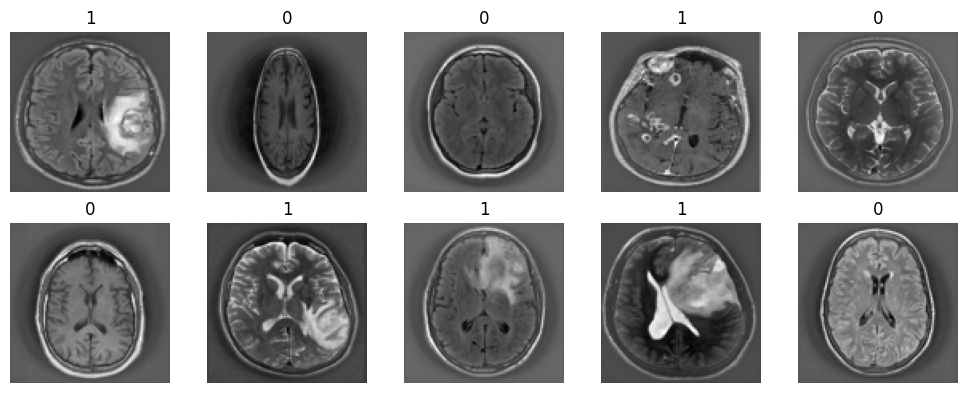

Cluster 1


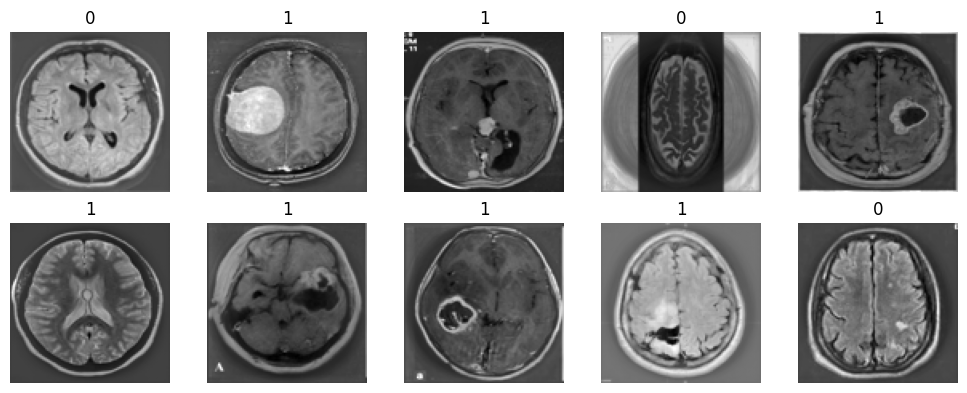

In [70]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 100, 100)  # reshape each flat image to 64x64
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 2, n_rows * 2))  # adjusted figure size
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(f"{label}")
    plt.tight_layout()
    plt.show()

# Visualize clusters
for cluster_id in np.unique(kmean.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmean.labels_ == cluster_id
    faces = x_train[in_cluster]
    labels = y_train[in_cluster]  # show true label or cluster ID

    # Optional: show only up to N images per cluster (e.g., first 10)
    N = 10
    faces = faces[:N]
    labels = labels[:N]

    plot_faces(faces, labels)

In [71]:
kmeans_labels = kmean.predict(x_test)

acc = accuracy_score(t_test, kmeans_labels)
acc_flipped = accuracy_score(t_test, 1-kmeans_labels)

max(acc, acc_flipped)

0.6470588235294118

In [72]:
from sklearn.cluster import KMeans

# Compute the mean vector for each class (assuming binary classes: 0 and 1)
mean_class_0 = x_train[y_train == 0].mean(axis=0)
mean_class_1 = x_train[y_train == 1].mean(axis=0)

# Stack them to form the init centers
init_centroids = np.vstack([mean_class_0, mean_class_1])

kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1, random_state=42)
kmeans.fit(x_train)

kmeans.inertia_

1729531.1592285412

In [73]:
kmeans_labels = kmeans.predict(x_test)

acc = accuracy_score(t_test, kmeans_labels)
acc_flipped = accuracy_score(t_test, 1-kmeans_labels)

max(acc, acc_flipped)

0.6470588235294118